# 変動音解析  
[小野測器 変動音解析とは](https://www.onosokki.co.jp/HP-WK/c_support/newreport/fluct_sound/fluct_sound.htm)  
音の大きさはそれほど大きくないのに、「気になる音」は世の中に数多くあります。 例えば車の走行時に時折聞こえる、「カタカタ」「ビリビリ」といった内装品が発する音や、小型モーターの回転音に混じる、「ジー」という異音などが挙げられます。 「気になる」原因はいくつかありますが、時間的な変動が顕著な音は、その大きさ（レベル）がそれほど大きくなくても耳障りに感じることが多いのです。

変動音解析とは、レベルに左右されない時間変動の大きな成分のみを抽出できる解析です。これにより、従来のFFTや基本ラフネス、変動強度では検出の難しかった、様々な時間変動の特徴を定量化できるようになります。 その他、様々な音のデザイン（味付け）に対して、音の音色（高低）および時間変動周期の２軸で評価できるため、従来の技術よりもより深い解析が可能になります。

変動音解析の単位（DLF）は、Depth of Loudness Fluctuation の略であり、ラウドネスの時間変動の山谷の深さ（差分）になります。解析結果のグラフは mDLF で表現されているので、実際には 1000 倍した値になります。 DLF の後の(s) はリニア表示、(p) はログ表示を表しています。（ s はラウドネスの単位 sone の頭文字、p はラウドネスレベルの単位 phon の頭文字から引用しています。）

[小野測器 音質評価とは](https://www.onosokki.co.jp/HP-WK/c_support/newreport/soundquality/soundquality_3.htm)  
変動強度計算の考え方  
人間は、音の大きさが変動する場合（大きい小さいを繰り返す）と、周波数が変動する場合（高い低いを 繰り返す）に変動感を感じます。この変動の周期が非常にゆっくりの場合には変動感（ふらつき感）をあまり感じず、変動の周期が、ある程度速くなると変動感を強く感じます。一番変動感を強く感じるのは、 一秒間に４回の速さで変動をする場合（変調周波数が ４Hz）と言われます。さらに変動の周期が速くなると、変動感は次第に小さくなっていきます。

変動強度の計算では、ラウドネスの時間履歴にどれだけ変動成分が含まれているかを調べています。ラウドネスが変調周波数 4 Hz に近い場合に、変動強度が大きくなります。
  
変動強度の基準  
変動強度の基準となる音は、1 kHz の純音を変調周波数 4 Hz で 100% AM 変調し、音圧レベルを 60 dB とした音です。この時、変動強度は 1 vacil となります。  
  
ラフネス計算の考え方  
ラフネスの場合も、音の大きさや周波数が変調している場合に感じます。ただし、その変調周波数はもっと高く、一秒間に70回ほど（変調周波数が 70 Hz ）の速さで変調をする場合に最も「粗い」と感じます。音を「粗い」と感じるとき、人間の聴覚では、その音の変調を聞き取っています。しかし、変動している音の一つ一つを分離して聞き取ることができないため、変動感ではなく粗さ感として感じます。  
  
ラフネスの基準  
ラフネスの基準となる音は、1 kHz の純音を変調周波数 70 Hz で 100% AM 変調し、音圧レベルを 60 dB とした音です。この時、ラフネスは 1 asper となります。

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線を内向きへ
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線を内向きへ
plt.rcParams["xtick.minor.visible"] = True           #x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True           #y軸補助目盛りの追加
plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10                #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5                 #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                 #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 14                       #フォントの大きさ
plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ

## 1. スペクトルだけ見てどんな音かを予想するのは難しい例

In [143]:
fs = 8192
N = 8192
f = 100.0 #信号の成分
mf = 10.0 #変調成分
ma = 1.0 #変調度
t = np.linspace(0.0,N/fs,N)
s1 = np.sin(2*pi*f*t)
m1 = (np.sin(2*pi*mf*t) + 1.0) /2.0 #0-1になるようにした
m_s = ma*m1 + (1.0-ma) #最大値は1、最小値は1-ma
sig = s1 * m_s #変調後も最大値は同じになるようにした

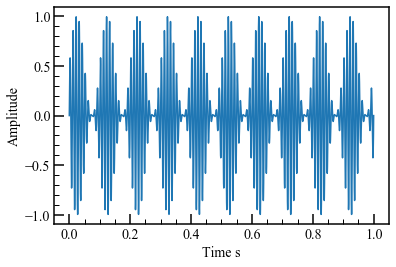

In [144]:
fig,axes = plt.subplots()
axes.plot(t,sig)
#axes.set_xlim(0.0,1/fs*500)
axes.set_xlabel("Time s")
axes.set_ylabel("Amplitude")
fig.savefig("graph/AMsound.png",dpi=400)

In [145]:
fft_array = np.abs(np.fft.fft(sig)) / N
freq_array = np.linspace(0.0,fs,N)

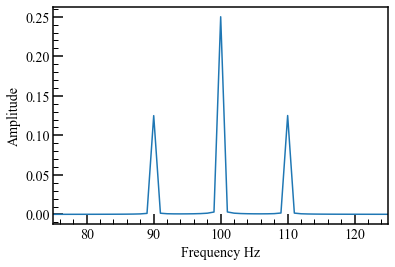

In [146]:
fig,axes = plt.subplots()
axes.plot(freq_array,fft_array)
axes.set_xlim(75.0,125.0)
axes.set_xlabel("Frequency Hz")
axes.set_ylabel("Amplitude")
fig.savefig("graph/AMsound_spectrum.png",dpi=400)

AM変調すると差と和の周波数成分がでる。スペクトルだけ見ると100Hzと96Hzと104Hzの信号が含まれていることしかわからない。
同じスペクトルを持つ別の信号を作ってみる。

In [147]:
s2 = np.sin(2*pi*f*t) \
+ 0.5*ma*np.sin(2*pi*(f-mf)*t+pi/3.0) \
+ 0.5*ma*np.sin(2*pi*(f+mf)*t+pi/2.0) #差と和の周波数の信号は位相をずらした

Text(0, 0.5, 'Amplitude')

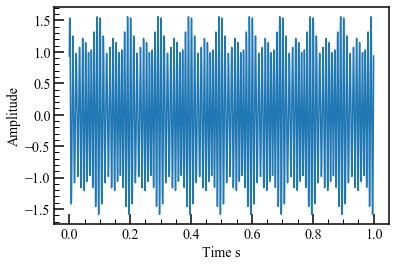

In [148]:
fig,axes = plt.subplots()
axes.plot(t,s2)
#axes.set_xlim(0.0,1/fs*500)
axes.set_xlabel("Time s")
axes.set_ylabel("Amplitude")

周波数特性が同じでも違って聞こえる

Text(0, 0.5, 'Amplitude')

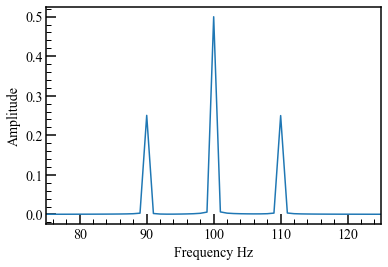

In [149]:
fig,axes = plt.subplots()
axes.plot(freq_array,np.abs(np.fft.fft(s2)) / N)
axes.set_xlim(75.0,125.0)
axes.set_xlabel("Frequency Hz")
axes.set_ylabel("Amplitude")

## 2. 変動音解析  
アルゴリズムが小野測器のHPには書いてない。たぶん包絡線を求めてFFTすれば良いと思う。  

与えられた時間関数$f(t)$をフーリエ変換し、$\omega>0$の範囲では$i$、$\omega<0$の範囲では$-i$を乗じフーリエ逆変換したものを元の時間関数のヒルベルト変換$fH(t)$と定義する。  
  
ヒルベルト変換は位相を90度遅らせる操作。
実部に元の信号、虚部にヒルベルト変換した信号を持つものを解析信号という。折返し周波数以降を0においても解析信号は得られる。実部と虚部が直交している。フェーザ表示と同じ。  
その絶対値を取るという意味について、実部と虚部の二乗和根で、位相が90度ずれているから$|a(t)| = A(t) \sqrt{cos^2(\theta)+sin^2(\theta)}$で、ルートの中は常に1になる。だから振幅の変調成分だけが出せる。

In [150]:
from scipy import signal

In [151]:
envelope = abs(signal.hilbert(sig)) #包絡線を求める

In [152]:
a = np.fft.fft(sig) * 2.0
a[N//2:] = 0.0

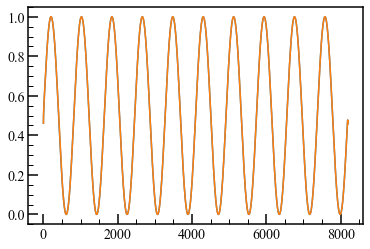

In [153]:
#Scipy使わなくても簡単に求まる
fig,axes = plt.subplots()
axes.plot(freq_array,np.abs(np.fft.ifft(a)))
axes.plot(freq_array,envelope)

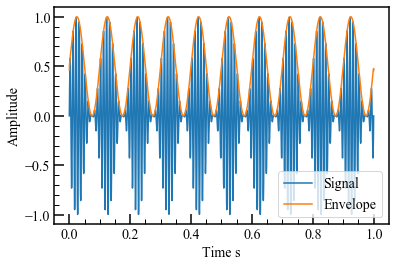

In [154]:
fig,axes = plt.subplots()
axes.plot(t,sig,label="Signal")
axes.plot(t,envelope,label="Envelope")
#axes.set_xlim(0.0,1/fs*500)
axes.set_xlabel("Time s")
axes.set_ylabel("Amplitude")
axes.legend(loc="best")
fig.savefig("graph/AMsound_envelope.png",dpi=400)

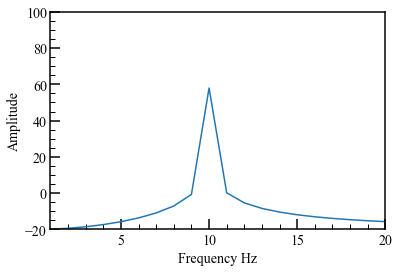

In [156]:
fig,axes = plt.subplots()
axes.plot(freq_array, 20.0*np.log10(abs(np.fft.fft(envelope-envelope.mean())) / N)+70)
axes.set_xlim(1.0,20.0)
axes.set_ylim(-20.0,100)
axes.set_xlabel("Frequency Hz")
axes.set_ylabel("Amplitude")
fig.savefig("graph/AMsound_envFFT.png",dpi=400)

ちゃんと変調成分が抽出できた

## 3. 変動成分を抜いた信号  
包括線で元の信号を割れば変動成分が除去できるはず。

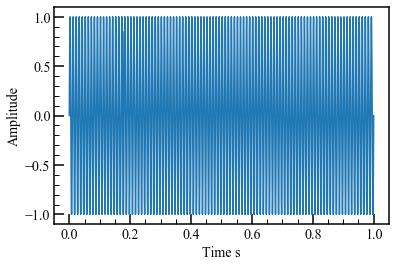

In [157]:
fig,axes = plt.subplots()
axes.plot(t,sig/envelope)
#axes.plot(t,envelope)
#axes.set_xlim(0.0,1/fs*500)
axes.set_xlabel("Time s")
axes.set_ylabel("Amplitude")
fig.savefig("graph/AMsound_norm.png",dpi=400)

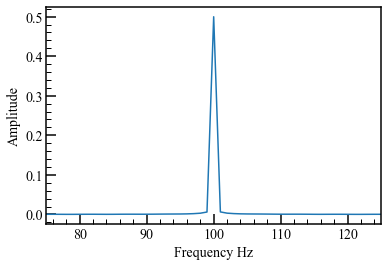

In [158]:
fig,axes = plt.subplots()
axes.plot(freq_array,np.abs(np.fft.fft(sig/envelope)) / N)
axes.set_xlim(75.0,125.0)
axes.set_xlabel("Frequency Hz")
axes.set_ylabel("Amplitude")
fig.savefig("graph/AMsound_normFFT.png",dpi=400)

In [159]:
np.std(sig/envelope)*np.sqrt(2.0)

0.9999570261601902

## 4. 鈴虫とコオロギのデータで変動音解析

In [160]:
import soundfile as sf
from pathlib import Path

### 4-1. 波形の読み込み

In [40]:
#FIRフィルタ
b = signal.firwin(numtaps=511,cutoff=20.0e3,pass_zero=True,fs=44100)
chug_wav_fir = signal.lfilter(b,1,chug_wav)

NameError: name 'chug_wav' is not defined

In [161]:
folder = Path("wav_data")

In [162]:
wav_path = list(folder.glob("*.wav"))
display(wav_path)

[WindowsPath('wav_data/korogi.wav'), WindowsPath('wav_data/suzumusi.wav')]

In [163]:
sig_suzumusi,fs = sf.read(str(wav_path[1]))
sig_korogi = sf.read(str(wav_path[0]))[0][0:len(sig_suzumusi)]

In [164]:
time_array = np.linspace(0.0,len(sig_korogi)/fs,len(sig_korogi))

In [165]:
#波形を確認して安定してそうな部分を切り抜き 200 ms
sig_suzumusi = sig_suzumusi[(time_array>1.6)&(time_array<1.8)]
sig_korogi = sig_korogi[(time_array>2.0)&(time_array<2.2)]

In [166]:
time_array = np.linspace(0.0,len(sig_korogi)/fs,len(sig_korogi))

### 4-2. 包括線を求める

In [167]:
korogi_env = abs(signal.hilbert(sig_korogi)) #包絡線を求める
suzumusi_env = abs(signal.hilbert(sig_suzumusi))

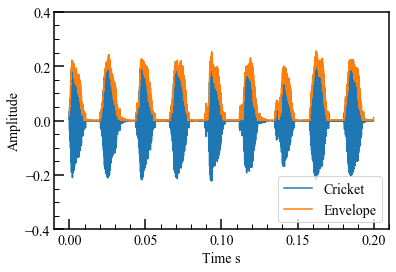

In [169]:
fig,axes = plt.subplots()
axes.plot(time_array,sig_korogi,label="Cricket")
axes.plot(time_array,korogi_env,label="Envelope")
axes.legend(loc="best")
axes.set_xlabel("Time s")
axes.set_ylabel("Amplitude")
axes.set_ylim(-0.4,0.4)
fig.savefig("graph/Cricket.png",dpi=400)

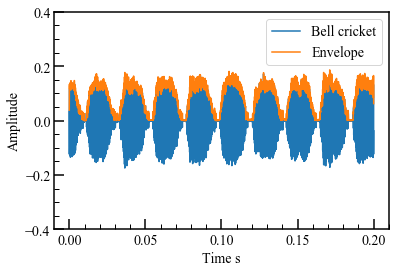

In [170]:
fig,axes = plt.subplots()
axes.plot(time_array,sig_suzumusi,label="Bell cricket")
axes.plot(time_array,suzumusi_env,label="Envelope")
axes.legend(loc="best")
axes.set_xlabel("Time s")
axes.set_ylabel("Amplitude")
axes.set_ylim(-0.4,0.4)
fig.savefig("graph/Bellcricket.png",dpi=400)

### 4-3. スペクトルの確認

In [171]:
def fft_ave(sig):
    N = 8192
    fft_ave = np.zeros(N//2+1)
    for i in range(len(sig)//N):
        fft_ave += np.abs(np.fft.rfft(sig[N*i:N*(i+1)]))
    fft_ave /= N
    return 20.0*np.log10(fft_ave) + 50.0
freq_array = np.linspace(0.0,44100/2.0,N//2+1)

In [172]:
def center_frequency(x):
    """
    JIS C 1514 厳密な中心周波数(exact midband frequency)を求める.
    """
    G = 10**(3/10) #オクターブ比. 10のべきによる系
    fr = 1000 #基準周波数[Hz]
    N = 3 #1/N オクターブバンド

    fm = G**(x/N) * fr #厳密な中間周波数[Hz]. Nが奇数の場合

    return fm

def bandedge_frequencies(fm):
    """
    JIS C 1514 帯域端周波数(bandedge frequencies)を求める.
    """
    G = 10**(3/10) #オクターブ比. 10のべきによる系
    N = 3 #1/N オクターブバンド

    f1 = G**(-1/(2*N)) * fm #下限周波数[Hz]
    f2 = G**(1/(2*N)) * fm

    return f1, f2

def one_third_octave_bands(freq_array, SPL):
    """
    1/3オクターブバンドの計算は, JIS C 1514に従う.
    http://kikakurui.com/c1/C1514-2002-01.html
    """
    center_freq = []
    one_third_octave_bands = []

    for x in range(-30, 100): #-30のとき中心周波数1Hz
        fm = center_frequency(x)
        f1, f2 = bandedge_frequencies(fm)

        if f2 > freq_array[-1]: #上限周波数がサンプリング周波数を超えたら終わり.
            break

        sum_amp = 0.0
        for i, narrow_freq in enumerate(freq_array):
            if narrow_freq >= f1 and narrow_freq < f2:
                pressure_amp = 10.0**(SPL[i]/10.0)
                sum_amp += pressure_amp
            elif narrow_freq > f2:
                break
            else:
                continue
    
        if not sum_amp == 0.0:
            center_freq.append(fm)
            one_third_octave_bands.append(10.0*np.log10(sum_amp))

    return center_freq, one_third_octave_bands

In [173]:
center_freq, korogi_bands = one_third_octave_bands(freq_array, fft_ave(sig_korogi)+30.0)
center_freq, suzumusi_bands = one_third_octave_bands(freq_array, fft_ave(sig_suzumusi)+30.0)

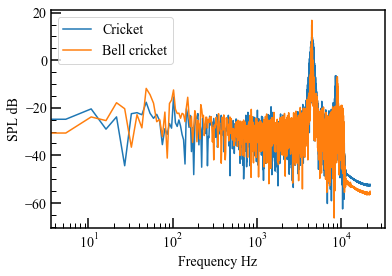

In [174]:
fig,axes = plt.subplots()
axes.plot(freq_array,fft_ave(sig_korogi),label="Cricket")
axes.plot(freq_array,fft_ave(sig_suzumusi),label="Bell cricket")
axes.set_xscale("log")
axes.set_xlabel("Frequency Hz")
axes.set_ylabel("SPL dB") #SPLと書いたが絶対値は意味無し
axes.legend(loc="best")
fig.savefig("graph/bug_spectrum.png",dpi=400)

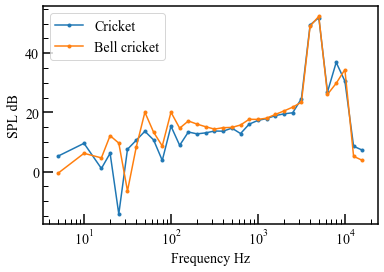

In [177]:
fig,axes = plt.subplots()
axes.plot(center_freq,korogi_bands,marker=".",label="Cricket")
axes.plot(center_freq,suzumusi_bands,marker=".",label="Bell cricket")
axes.set_xscale("log")
axes.set_xlabel("Frequency Hz")
axes.set_ylabel("SPL dB") #SPLと書いたが絶対値は意味無し
axes.legend(loc="best")
fig.savefig("graph/bug_spectrum_oct.png",dpi=400)

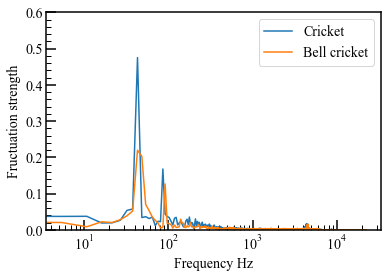

In [219]:
fig,axes = plt.subplots()
axes.plot(freq_array,10.0*np.power(10.0,(fft_ave(korogi_env)-50.0)/20.0),label="Cricket")
axes.plot(freq_array,10.0*np.power(10.0,(fft_ave(suzumusi_env)-50.0)/20.0),label="Bell cricket")
axes.set_xscale("log")
axes.set_xlabel("Frequency Hz")
axes.set_ylabel("Fructuation strength")
axes.legend(loc="best")
axes.set_ylim(0.0,0.6)
fig.savefig("graph/bug_spectrum_flu.png",dpi=400)

### 4-4. 変動成分の除去

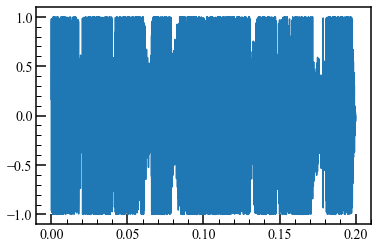

In [188]:
fig,axes = plt.subplots()
axes.plot(time_array,sig_korogi/korogi_env)

In [189]:
N = 8192
korogi_norm = sig_korogi/korogi_env
korogi_norm_fft = fft_ave(korogi_norm)

Text(0, 0.5, 'SPL dB')

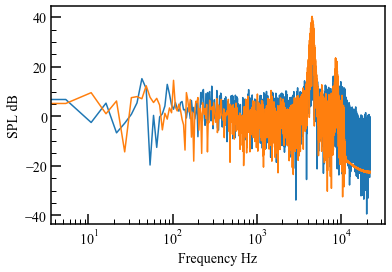

In [193]:
fig,axes = plt.subplots()
axes.plot(freq_array,korogi_norm_fft)
axes.plot(freq_array,fft_ave(sig_korogi)+30.0)
axes.set_xscale("log")
axes.set_xlabel("Frequency Hz")
axes.set_ylabel("SPL dB") #SPLと書いたが絶対値は意味無し

変動成分抜いてもスペクトルは変わらない

### 5. 変動成分を除去した音声の保存  

In [216]:
w = 0.5
korogi_norm = sig_korogi/((1.0-w)+w*korogi_env)
suzumusi_norm = sig_suzumusi/((1.0-w)+w*suzumusi_env)

In [217]:
sf.write("norm_korogi.wav", korogi_norm*0.5, 44100)

In [218]:
sf.write("norm_suzumusi.wav", suzumusi_norm*0.5, 44100)